!!! info Sources (et Remerciements)
Document réalisé à partir du travail de Thibaut Kovaltchouk.
!!!

In [ ]:
## Merci de valider cette cellule !
import random as r
from _DM_04 import *
go()

# Présentation du jeu
Le jeu de Babylone se joue à deux joueurs avec des briques empilables de forme identique mais de différentes couleurs. On peut par exemple utiliser des briques de Lego pour y jouer concrètement. Dans toute la suite, nous supposerons que les couleurs sont numérotées de 0 à $C-1$ et qu'il y a $N$ exemplaires de chaque couleur (donc au total $N \times C$ briques).

Au début du jeu, les briques sont alignées côte à côte : chaque brique est indépendante et constitue à elle seule une colonne de hauteur 1. À tour de rôle, chaque joueur doit choisir deux colonnes compatibles et les empiler (en mettant celle de son choix au-dessus de l'autre). Deux colonnes sont compatibles si elles ont la même hauteur (c'est-à-dire sont constituées d'un même nombre de briques) ou si leurs briques supérieures (celle qui est tout en haut de la colonne) ont la même couleur. Le premier joueur qui ne peut plus jouer (parce qu'il n'y a plus 2 colonnes compatibles) a perdu.

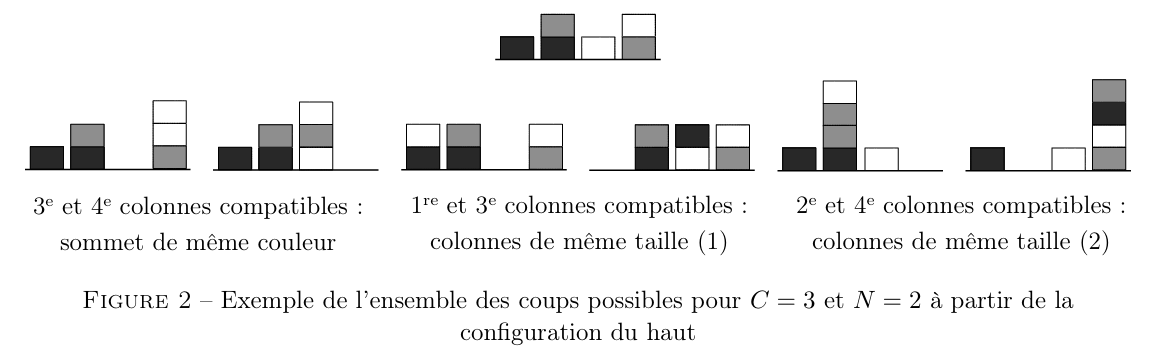

## Codage
Dans toute la suite, nous adopterons les conventions suivantes~: 
 - une colonne de jeu est représenté par un 2-tuple `(c, h)` où `c` est la couleur de la brique supérieure de la colonne (les autres couleurs n'ayant pas d'importance) et `h` est la hauteur de la colonne~;
 - une configuration de jeu est une liste de colonnes (donc une liste de tuples). Comme l'ordre des colonnes n'a pas d'importance, on fera en sorte que les colonnes d’une configuration soient triées dans l’ordre croissant (cf. ordre lexicographique ci-dessous) car cela sera utilisé par la suite.

??? info Ordre lexicographique 
 Comparaison et ordre sur les séquences
 Les relations d’ordre que l’on peut tester grâce aux opérateurs <, <=, >, >= possède une signification
 sur les séquences : dans ce cas là, on compare les premiers éléments, puis, s’ils sont égaux les deuxièmes
 et ainsi de suite. C’est l’ordre utilisé pour un dictionnaire également appelé ordre lexicographique. Ainsi,
 toutes les relations suivantes sont vraies :
- `(0, 4, 3) < (1, 0, 0)` car 0 < 1;
- `(0, 4, 3) < (0, 4, 4)` car 3 < 4;
- `[(0, 4), (3, 1)] < [(1, 0), (3, 4)]` car (0, 4) < (1, 0) car 0 < 1;
- `[(0, 4), (3, 1)] < [(0, 4), (4, 1)]` car (3, 4) < (4, 1) car 3 < 4;
- `[(0, 4), (3, 1)] < [(0, 4), (3, 2)]` car (3, 1) < (3, 2) car 1 < 2.
???

Ainsi, le codage des 7 configurations présentées sur la figure précédente nous donne (on numérote les couleurs de la plus sombre à la plus claire) : 
`[(0, 1), (1, 2), (2, 1), (2, 2)]`
	`[(0, 1), (1, 2), (2, 3)]}`, `[(0, 1), (1, 2), (2, 3))`, `[(1, 2), (2, 2), (2, 2)]}` ...
    `[(0, 2), (1, 2), (2, 2)]`, `[(0, 1), (2, 1), (2, 4)]`, `[(0, 1), (1, 4), (2, 1)]}`

On peut remarquer que la somme des hauteurs (deuxième composante des colonnes) est forcément une constante lors d'une partie (ici 6). 

!!! question Question 1
Partant de la configuration suivante `[(0, 2), (0,2), (1,2)]`, donner la ou les configurations possibles suivantes parmi les propositions : 
1. `[(0, 1), (0, 3), (1,2)]`;
2. `[(0, 4), (1, 4)]`;
3. `[(1, 4), (0, 2)]`;
4. `[(0, 2), (0, 4)]`;
5. `[(0, 4), (1, 2), (0, 0)]`;
6. `[(0, 2), (1, 4)]`.
!!!

In [ ]:
# Votre réponse doit être un tuple d'entiers affecté à la variable Q1.
Q1 = (1,2)

In [ ]:
test_q1()  

# Codage du jeu
!!! question Question 2
Écrire une fonction `init(C:int, N:int) -> [(int, int)]` qui renvoie le codage de la configuration initiale en fonction du nombre de couleurs `C` et du nombre de briques par couleur `N`. Ainsi, `init(3, 2)` doit renvoyer `[(0, 1), (0, 1), (1, 1), (1, 1), (2, 1), (2, 1)]`.
!!!

In [ ]:
# Votre fonction


In [ ]:
test_q2()

!!! question Question 3
Écrire une fonction `compatibles(coli:(int, int), colj:(int, int)) -> bool` qui renvoie un booléen permettant de savoir si les deux colonnes `coli` et `colj` sont compatibles.
!!!
??? tip Tests
`compatibles((0, 1), (0, 2))` et `compatibles((1, 2), (0, 2))` doivent renvoyer `True`, mais l'appel à `compatibles((0, 1), (2, 2))`  doit renvoyer `False`.
???

!!! question Question 4
Compléter la fonction `jouerCoup(config:[(int, int)], i:int, j:int) -> [(int, int)]` qui renvoie, à partir d'une configuration existante `config`, la nouvelle configuration une fois qu'on a décidé d'empiler la colonne indexée `j` sur la colonne indexée `i`. On considère ici que les colonnes données sont forcément compatibles et on ne doit donc pas le vérifier. 
!!!


??? warning Attention
`j` et `i` sont forcément différents mais mais on peut avoir à différencier les cas `i<j` et `j<i`. Vous pouvez utiliser la commande `L.pop(k)` qui renvoie l'élément d'indice `k` d'une liste `L` tout en l'enlevant de la liste `L`.
???

??? tip Test
Si on reprend l’exemple de la Figure 2 on doit avoir :
`jouerCoup([(0, 1), (1, 2), (2, 1), (2, 2)], 0, 2)` qui renvoie `[(1, 2), (2, 2), (2, 2)]` et `jouerCoup([(0, 1), (1, 2), (2, 1), (2, 2)], 2, 0)` qui renvoie `[(0, 2), (1, 2), (2, 2)]`.
???

In [ ]:
def jouerCoup(config, i, j): 
    prochConfig = config.copy() # copie de la configuration actuelle
    # retirer les 2 colonnes indexées i et j
    
    # calculer la nouvelle colonne résultante (j sur i)
    nouvCol = ...
    prochConfig.append(nouvCol) # ajouter la nouvelle colonne à prochConfig
    prochConfig.sort() # trier la liste
    return prochConfig # renvoyer la configuration

In [ ]:
test_q4()

!!! question Question 5
Quelle est la complexité temporelle de la fonction précédente en fonction du nombre de colonnes (c'est-à-dire de la longueur de `config`) ? Justifier.
!!!

In [ ]:
Q5 = 'O(xxxxx)'

!!! question Question 6
On se propose de profiter que la configuration soit déjà dans l'ordre avant l'insertion pour améliorer la complexité temporelle de l'opération d'insertion (ligne 7 et 8). Proposer une fonction `insertion(L, elt) -> None` de coût linéaire en la taille de la liste `L` qui insère  l'élément `elt` dans la liste `L` dont on suppose qu'elle est déjà triée. Cette fonction doit modifier `L` mais ne renvoie rien.
!!!

On remplace la fin de la fonction jouerCoup ainsi :

In [ ]:
def jouerCoup(config, i, j):
    prochConfig = config.copy() # copie de la configuration actuelle
    # retirer les 2 colonnes indexées i et j
    
    # calculer la nouvelle colonne résultante (j sur i)
    nouvCol = ...
    insertion(prochConfig, nouvCol) # introduire dans l’ordre
    return prochConfig              # renvoyer la configuration

!!! question Question 7
Quelle est la nouvelle complexité ? Justifier.
!!!

In [ ]:
Q7 = 'O(xxxxx)'

 On souhaite avoir une fonction `configSuivantes(config:[(int, int)])-> [[(int, int)]]`
 qui renvoie une liste des configurations accessibles après un coup.
 
!!! question Question 8
 Proposer le ou les tests pour remplacer `TESTS`.
!!!

In [ ]:
def configSuivantes(config):
    ConfigFutures = []
    nCol = len(config)
    for i in range(nCol):
        for j in range(nCol):
            if TESTS:
                prochConfig = jouerCoup(config, i, j)
                if prochConfig not in ConfigFutures:
                    ConfigFutures.append(prochConfig)
    return ConfigFutures

!!! question Question 9
Quelle est l'intérêt de la ligne 8 ? 
!!!

In [ ]:
test_q8()

## Simulation d'un jeu aléatoire
??? info Note
L'importation du module suivant est supposé faite ainsi tout le long de cette partie :
```
import random as r
```
???

On souhaite simuler un jeu aléatoire du début à la fin. Pour connaitre le vainqueur, on va utiliser la numérotation suivante : `0` représente le premier joueur (celui qui fait le premier coup) et `1` représente le deuxième joueur. 

!!! question Question 10
En remarquant que le nombre de colonnes diminue d'une unité à chaque coup, et que le nombre initial de colonnes est connu, proposer une fonction : 
`tour(config:[(int, int)], C:int, N:int) -> int` 
qui renvoie le joueur qui doit jouer face à une configuration donnée `config`, connaissant `C` et `N`, le nombre de couleurs et le nombre de briques par couleur. Ainsi, `tour(init(C, N), C, N)` doit toujours renvoyer `0`. 
!!!

In [ ]:
test_q10()

!!! question Question 11
En utilisant `r.choice`, écrire une fonction `partieAleatoire(C:int, N:int) -> int` qui joue une partie aléatoire (du début à la fin) et renvoie le numéro du gagnant. On ne demande pas de stocker les configurations intermédiaires.
!!!

??? info `r.choice()`
`r.choice(seq)` method of random.Random instance. Choose a random element from a non-empty sequence.
???

!!! question Question 12 
On souhaite, pour `C = 3` et `N = 2`, faire des statistiques sur 1000 parties pour connaitre la proportion de victoires pour le joueur `0`. Proposer une série d'instructions permettant d'afficher la proportion de victoires.
!!!

!!! note Remarque
On observe une proportion d'environ `0.3`, ce qui tend à prouver que le joueur 0 est plutôt en mauvaise posture. Avec la version vendue dans le commerce (`C = 4` et `N = 3`), on trouve une proportion proche de `0.5`, ce qui semble plus équilibrée.
!!!

## Symétries et simplification - Facultatif
Il est clair qu’échanger deux couleurs dans une configuration ne change rien à la situation de la partie. Ainsi, dans le but de simplifier la modélisation du jeu, on décide de ne garder qu’un représentant pour l’ensemble des configurations identiques à une permutation des couleurs près. Le choix se porte sur la configuration la plus petite (dans l’ordre lexicographique). Par exemple, la configuration initiale présentée sur la \UPSTIfig{fig:2} correspond à deux colonnes de taille 1 de couleurs différentes et deux colonnes de taille 2 de couleurs différentes, mais d'une paire de couleurs différentes de la première. Ainsi, toutes ces configurations sont symétriques et n'ont donc pas à être appréhendées plusieurs fois : 
- `[(0, 1), (1, 2), (2, 1), (2, 2)]`;
- `[(0, 1), (1, 1), (1, 2), (2, 2)]`;
- `[(0, 1), (0, 2), (1, 1), (2, 2)]`;
- `[(0, 1), (0, 2), (1, 2), (2, 1)]`;
- `[(0, 2), (1, 1), (2, 1), (2, 2)]`;
- `[(0, 2), (1, 1), (1, 2), (2, 1)]`.

!!! question Question 13
Comme l'obtention d'une configuration correspond à une permutation des couleurs, donner le nombre maximum de configurations symétriques différentes qu'on peut obtenir à partir d'une configuration donnée (donner la réponse en fonction de $N$ et $C$). 
!!!

On souhaite écrire une fonction `representant(config:[(int, int)], C:int) ->[(int, int)]}` qui renvoie la configuration la plus petite parmi toutes les configurations identiques à une permutation des couleurs près. Pour cela, il nous faut : 
- créer une fonction `permutations(L)` qui crée toutes les permutations possibles d'une liste `L`;
- créer une fonction `appliquerPermutation(config:[(int, int)], perm:[int]) -> [(int, int)]` qui renvoie une configuration après application d'une permutation; 
- créer finalement `representant(config:[(int, int)], C) ->[(int, int)]` qui consiste principalement en la recherche d'un minimum sur toutes les configurations identiques à une permutation des couleurs près. 

On vous donne le code de la fonction `permutations(L)`, fonction qui renvoie la liste de toutes les permutations possibles des éléments de `L`. 

In [ ]:
def permutations(L):
    if len(L) <= 1:
        return [L[:]]
    else:
        resultat = []
        for i in range(len(L)):
            dernier = L.pop(i)
            for p in permutations(L):
                p.append(dernier)
                resultat.append(p)
            L.insert(i, dernier)
        return resultat

!!! question Question 14
Donner la relation de récurrence sur la complexité que vous trouvez en notant $N$ la longueur de la liste `L`. La simplifier au maximum en considérant $N$ suffisament grand. Conclure sur la complexité.
!!!

!!! question Question 15 
Écrire une fonction `appliquerPermutation(config:[(int, int)], perm:[int]) -> [(int, int)]}` qui renvoie une nouvelle configuration qui est le résultat de la permutation `perm` sur la configuration `config`. On n'oubliera pas que la configuration de sortie doit rester un tuple de colonnes triées. 
!!!

!!! question Question 16
Compléter la fonction `representant(config:[(int, int)], C:int) ->[(int, int)]` qui doit renvoyer la configuration la plus petite.  
!!!

In [ ]:
def representant(config, C):
    perms = permutations(list(range(C)))
    # initialisation(s)
    #...
    for perm in perms:
        configCandidate = appliquerPermutation(config, perm)
        # mise à jour éventuelle d’une variable
        # ...
    # finalisation et renvoie du résultat
    # ..